In [ ]:
!pip install PyMuPDF==1.18.9

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 14.2 MB/s 


In [ ]:
import fitz
from typing import Tuple
import os

In [ ]:
def convert_pdf2img(input_file: str, pages: Tuple = None):
    """Преобразует PDF в изображение и создает файл за страницей"""

    pdfIn = fitz.open(input_file)
    output_files = []

    for pg in range(pdfIn.pageCount):
        if str(pages) != str(None):
            if str(pg) not in str(pages):
                continue

        page = pdfIn[pg]
        rotate = int(0)

        zoom_x = 4
        zoom_y = 4

        mat = fitz.Matrix(zoom_x, zoom_y).preRotate(rotate)
        pix = page.getPixmap(matrix=mat, alpha=False)
        output_file = f"/content/drive/MyDrive/output/{os.path.splitext(os.path.basename(input_file))[0]}_page{pg+1}.png"
        pix.writePNG(output_file)
        output_files.append(output_file)
    pdfIn.close()
    summary = {
        "Исходный файл": input_file, "Страниц": str(pages), "Выходной файл(ы)": str(output_files)
    }
    # Printing Summary
    print("#### Отчет ########################################################")
    print("\n".join("{}:{}".format(i, j) for i, j in summary.items()))
    print("###################################################################")
    return output_files

In [ ]:

convert_pdf2img('/content/drive/MyDrive/Система анализа российского рынка средств измерений/Дата-сет для задачи №1/Разметка/2008-39798-08.pdf')

#### Отчет ########################################################
Исходный файл:/content/drive/MyDrive/Система анализа российского рынка средств измерений/Дата-сет для задачи №1/Разметка/2008-39798-08.pdf
Страниц:None
Выходной файл(ы):['/content/drive/MyDrive/output/2008-39798-08_page1.png', '/content/drive/MyDrive/output/2008-39798-08_page2.png']
###################################################################


['/content/drive/MyDrive/output/2008-39798-08_page1.png',
 '/content/drive/MyDrive/output/2008-39798-08_page2.png']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
nemo = cv2.imread('/content/drive/MyDrive/output/2008-39798-08_page1.png')
nemo = cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)

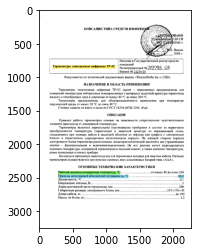

In [ ]:
plt.imshow(nemo)

In [ ]:
hsv_nemo = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)

In [ ]:
hsv_nemo[2420][500]

array([ 55, 147, 104], dtype=uint8)

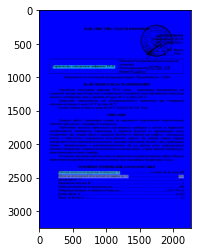

In [ ]:
plt.imshow(hsv_nemo)

In [ ]:
light_orange = (50,100,20)
dark_orange = (255, 255, 230)

In [ ]:
mask = cv2.inRange(hsv_nemo, light_orange, dark_orange)

In [ ]:
result = cv2.bitwise_and(nemo, nemo, mask=mask)

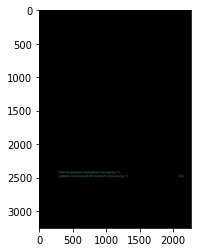

In [ ]:
plt.imshow(result)

In [ ]:
!pip install pillow==9.0

In [ ]:
import cv2
import numpy as np
import easyocr
import matplotlib.pyplot as plt


In [ ]:
def recognize_text(img_path):
    '''loads an image and recognizes text.'''

    reader = easyocr.Reader(['ru'])
    return reader.readtext(img_path)

In [ ]:
result1 = recognize_text(result)
result1

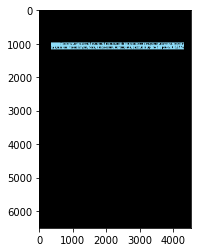

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(result, cmap="gray")

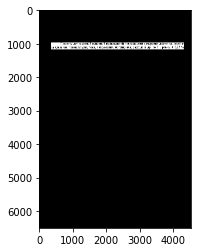

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")


In [ ]:
from PIL import Image
import PIL